In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [5]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [6]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [7]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

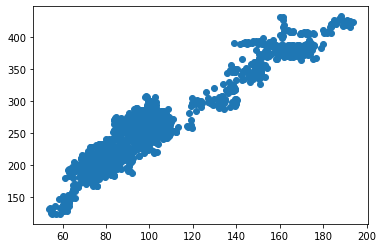

In [8]:
plt.scatter(x, y)

In [9]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def square(self,X):
        return [i ** 2 for i in X]
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [10]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


In [11]:
hyp.BGD(x, y)

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [32239.819047480003,
  28659.926269274074,
  25481.260297660374,
  22658.85248004757,
  20152.774155396743,
  17927.57178261923,
  15951.765378589265,
  14197.403170165,
  12639.66615986924,
  11256.517011013399,
  10028.388285034633,
  8937.905620533307,
  7969.641937819212,
  7109.89919169254,
  6346.514584912167,
  5668.68850084868

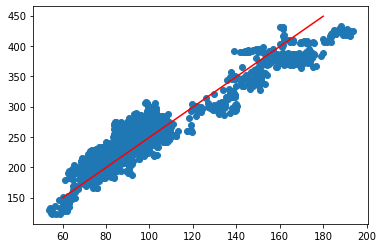

In [12]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

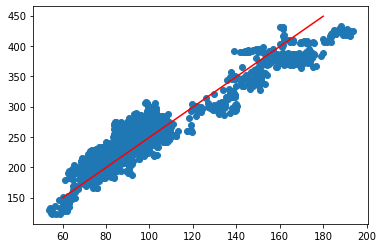

In [13]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [14]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


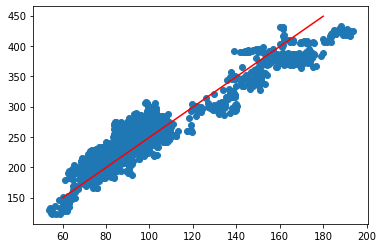

In [15]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

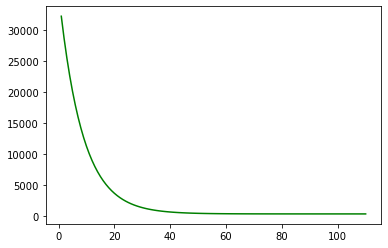

In [16]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [17]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def square(self,X):
        return [i ** 2 for i in X]
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    def train_test_split(self,X,Y, train = 0.8):
        X_train,Y_train = X[:int(len(X)*0.8)],Y[:int(len(X)*0.8)]
        X_test,Y_test = X[int(len(X)*0.8):],Y[int(len(X)*0.8):]
        return X_train,Y_train,X_test,Y_test
    def adagrad(self, X, Y, alpha=0.5, accuracy=0.01, max_steps=5000,eps = 0.00001):
        X,Y,X_test,Y_test = hyp.train_test_split(X,Y)
        v_w, v_b = 0,0
        steps, errors, test_errors = [], [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            v_w = v_w + dJ0**2
            v_b = v_b + dJ1**2
            self.b0 -= (alpha/np.sqrt(v_w + eps)) * dJ0
            self.b1 -= (alpha/np.sqrt(v_b + eps)) * dJ1        
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
            test_errors.append(hyp.error(X_test,Y_test))
        return steps, errors

In [18]:
hyp = hypothesis()
steps, errors = hyp.adagrad(x, y)
J = hyp.error(x, y)

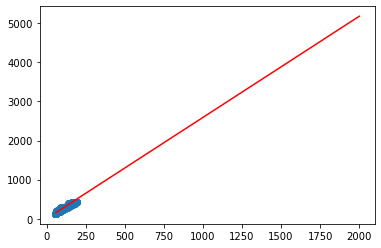

In [19]:
X0 = np.linspace(60, 2000, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [20]:
J = hyp.error(x, y)
print(f'{J} error after adagrad')

363.2514723354544 error after adagrad


In [22]:
gazp = pd.read_csv('data/GAZP_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [23]:
x = gazp['<CLOSE>']
y = sber['<CLOSE>']

In [24]:
hyp = hypothesis()
hyp.error(x,y)

5769.919997525599

In [25]:
hyp.adagrad(x,y)

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [26]:
hyp.error(x,y)

741.5332049811107

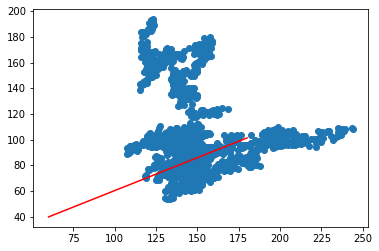

In [27]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [28]:
#Корреляция была не очень))))))

In [29]:
yndx = pd.read_csv('data/YNDX_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')
res = pd.merge(yndx, sber, on='<DATE>')

In [30]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

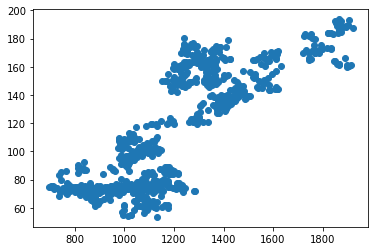

In [31]:
plt.scatter(x,y)

In [32]:
hyp = hypothesis()

In [33]:
hyp.error(x,y)

7214.540265572792

In [34]:
hyp.adagrad(x,y)

([1, 2, 3, 4, 5, 6, 7],
 [105296.37762943907,
  4269.286665147403,
  420.87400789046,
  305.0404847150099,
  301.5779923278297,
  301.47317546840486,
  301.4686643730641])

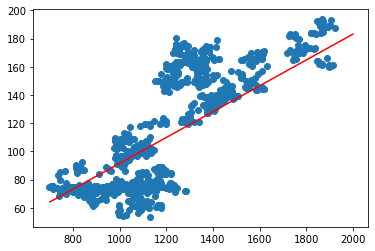

In [35]:
X0 = np.linspace(700, 2000, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [36]:
x = x.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_train),y_train)

541.0868717322647

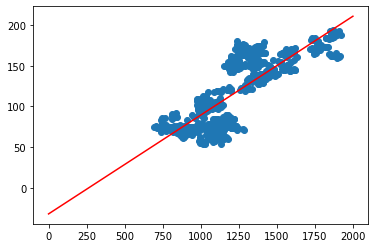

In [40]:
X0 = np.linspace(0,2000, 100).reshape(-1,1)
Y0 = reg.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [41]:
mean_squared_error(hyp.predict(X_train),y_train)

620.0599919997102

In [ ]:
#библиотечная по-лучше делает, а главное быстрее